In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import cv2

from skimage.transform import resize

from keras.preprocessing.image import img_to_array, load_img
from keras import Sequential
from keras.layers import Conv2D, Dropout, MaxPool2D, Activation, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical

import os
import random

%matplotlib inline

### Read the data

In [20]:
data_dir = 'train'
categories = ['Mug', 'Not']

In [21]:
size = 50
depth = 3

train_data = []


def create_training_data(data_dir, categories):
    for cat in categories: 
        # path to Mug and not mugs 
        path = os.path.join(data_dir, cat)

        # get the index of the class(Mug, Not) and assign it to class label 
        class_num = categories.index(cat)

        # Read the images 
        for img in os.listdir(path):
            if img != '.DS_Store':
                # Convert each image to an array
                img_array = plt.imread(os.path.join(path, img))
                # resize the image
                img_res = resize(img_array, (size,size,depth))
                # Append the images to the train_data list 
                train_data.append([img_res,class_num])
    
    return train_data

In [22]:
train_data = create_training_data(data_dir,categories)

In [23]:
print(len(train_data))

43


#### Shuffle the data

In [24]:
random.shuffle(train_data)

#### Examine the data

In [30]:
# The first 5 labels

for img in train_data[:5]:
    print(img[1])

1
0
1
1
0


### Extract the features and the labels and assign them to X and y 

In [31]:
X = []
y = []

for features, labels in train_data:
    X.append(features)
    y.append(labels)

In [32]:
X[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.98823529, 0.99607843, 0.99411765],
        [0.98823529, 0.99607843, 0.99411765],
        [0.98823529, 0

In [48]:
#### Convert X to Numpy array and reshape the data to 4-D
X = np.array(X).reshape(-1,size,size, depth)

In [49]:
# Check the Shape of the array
X.shape

(43, 50, 50, 3)

In [42]:
## Add one-hot encoding to labels y
y = to_categorical(y)

In [43]:
y.shape

(43, 2)

### Model Creation 

In [88]:
# Create a Sequential Model 
model = Sequential()

# Add first convolutional Layers
model.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape=(50,50,3)))
# Add pooling layer 
model.add(MaxPool2D(pool_size=(2,2)))


# Add second convolutional Layers
model.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.4))

## Flatten the data and add FC layers
model.add(Flatten())

# Add Dropout layer 
model.add(Dropout(0.4))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(2,activation='softmax'))

In [89]:
# Check the summary of the model 
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)              

In [90]:
## Compile the model 
model.compile(loss = 'categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [91]:
## Fit the model 
model.fit(X[:43], y, batch_size=7, epochs= 20, validation_split=0.3)

Train on 30 samples, validate on 13 samples
Epoch 1/20
30/30 [==============================] - 1s 23ms/step - loss: 0.6964 - accuracy: 0.6000 - val_loss: 0.5899 - val_accuracy: 0.6923
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.7322 - accuracy: 0.5333 - val_loss: 0.6072 - val_accuracy: 0.6923
Epoch 3/20
30/30 [==============================] - 0s 11ms/step - loss: 0.6380 - accuracy: 0.6000 - val_loss: 0.5503 - val_accuracy: 0.6923
Epoch 4/20
30/30 [==============================] - 0s 12ms/step - loss: 0.5378 - accuracy: 0.7333 - val_loss: 0.5877 - val_accuracy: 0.7692
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.5070 - accuracy: 0.8000 - val_loss: 0.4609 - val_accuracy: 0.7692
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4255 - accuracy: 0.8000 - val_loss: 0.5056 - val_accuracy: 0.7692
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.3357 - accuracy: 0.8667 - val_loss: 0.4

In [92]:
hist = model.history

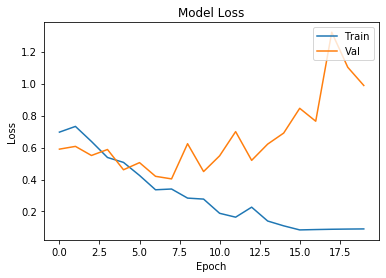

In [93]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')


plt.show()

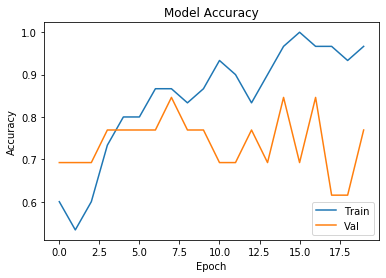

In [94]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'lower right')

plt.show()

#### Model 2

In [95]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape=(50,50,3)))
model2.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model2.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.4))


model2.add(Flatten())
model2.add(Dense(256, activation = 'relu'))
model2.add(Dropout(0.5))

model2.add(Dense(2,activation='softmax'))

In [96]:
model2.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 128)       0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 128)      

In [97]:
model2.compile(loss = 'categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [98]:
model2.fit(X, y, batch_size=7, epochs= 20, validation_split=0.3)

Train on 30 samples, validate on 13 samples
Epoch 1/20
30/30 [==============================] - 1s 48ms/step - loss: 0.7968 - accuracy: 0.5667 - val_loss: 0.6311 - val_accuracy: 0.6923
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.7273 - accuracy: 0.5333 - val_loss: 0.6581 - val_accuracy: 0.6923
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.6775 - accuracy: 0.4667 - val_loss: 0.6679 - val_accuracy: 0.6923
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.7009 - accuracy: 0.4667 - val_loss: 0.6247 - val_accuracy: 0.6923
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.6538 - accuracy: 0.5667 - val_loss: 0.6207 - val_accuracy: 0.6923
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.6226 - accuracy: 0.5667 - val_loss: 0.5666 - val_accuracy: 0.6923
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.5892 - accuracy: 0.6000 - val_loss:

In [99]:
hist2 = model2.history

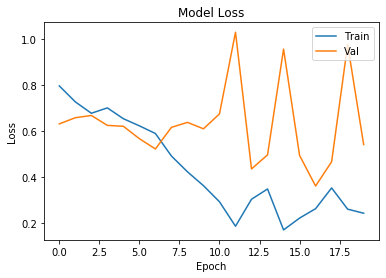

In [100]:
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')


plt.show()

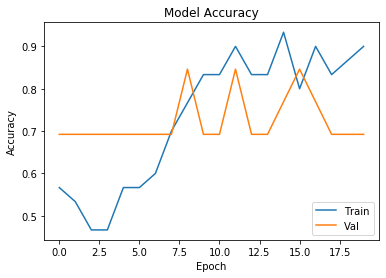

In [101]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'lower right')

plt.show()

#### Model 3

In [102]:
model3 = Sequential()
model3.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same', input_shape=(50,50,3)))
model3.add(Conv2D(32,(3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(64,(3,3), activation = 'relu', padding = 'same'))
model3.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model3.add(Conv2D(128,(3,3), activation = 'relu', padding = 'same'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.2))


model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(64, activation = 'relu'))
model3.add(Dense(32, activation = 'relu'))
model3.add(Dropout(0.5))

model3.add(Dense(2,activation='softmax'))

In [104]:
model3.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 50, 50, 32)        896       
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 25, 25, 64)        18496     
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 25, 25, 128)       73856     
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 25, 25, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 128)      

In [105]:
model3.compile(loss = 'categorical_crossentropy', 
             optimizer='adam',
             metrics=['accuracy'])

In [106]:
model3.fit(X, y, batch_size=4, epochs= 25, validation_split=0.3)

Train on 30 samples, validate on 13 samples
Epoch 1/25
30/30 [==============================] - 2s 57ms/step - loss: 0.7652 - accuracy: 0.5667 - val_loss: 0.6789 - val_accuracy: 0.6923
Epoch 2/25
30/30 [==============================] - 1s 35ms/step - loss: 0.6916 - accuracy: 0.6000 - val_loss: 0.6683 - val_accuracy: 0.6923
Epoch 3/25
30/30 [==============================] - 1s 38ms/step - loss: 0.7028 - accuracy: 0.5667 - val_loss: 0.6731 - val_accuracy: 0.6923
Epoch 4/25
30/30 [==============================] - 1s 37ms/step - loss: 0.6932 - accuracy: 0.5667 - val_loss: 0.6893 - val_accuracy: 0.6923
Epoch 5/25
30/30 [==============================] - 1s 37ms/step - loss: 0.6901 - accuracy: 0.5667 - val_loss: 0.6824 - val_accuracy: 0.6923
Epoch 6/25
30/30 [==============================] - 2s 54ms/step - loss: 0.6910 - accuracy: 0.5333 - val_loss: 0.6603 - val_accuracy: 0.6923
Epoch 7/25
30/30 [==============================] - 1s 45ms/step - loss: 0.6941 - accuracy: 0.5667 - val_loss:

In [107]:
hist3 = model3.history 

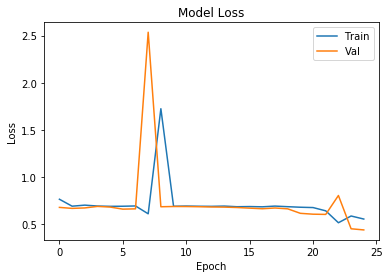

In [108]:
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper right')


plt.show()

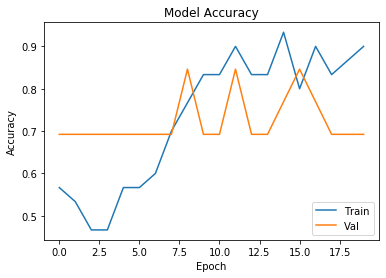

In [109]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'],loc = 'lower right')

plt.show()

### Testing all Models 

In [111]:
### Create test images 

test_dir = 'test'
categories = ['Mug', 'Not']


size = 50
depth = 3

test_data = []


def create_testing_data(data_dir, categories):
    for cat in categories: 
        # path to Mug and not mugs 
        path = os.path.join(data_dir, cat)

        # get the index of the class(Mug, Not) and assign it to class label 
        class_num = categories.index(cat)

        # Read the images 
        for img in os.listdir(path):
            if img != '.DS_Store':
                # Convert each image to an array
                img_array = plt.imread(os.path.join(path, img))
                # resize the image
                img_res = resize(img_array, (size,size,depth))
                # Append the images to the train_data list 
                test_data.append([img_res,class_num])
    
    return test_data

In [112]:
# Create test data 
test_data = create_testing_data(test_dir, categories)

In [114]:
print(len(test_data))

10


In [117]:
# Shuffle Data
random.shuffle(test_data)

In [118]:
# Create X_test and y_test 

X_test = []
y_test = []

for features, labels in train_data:
    X_test.append(features)
    y_test.append(labels)

In [119]:
### Convert X_test to numpy array and reshape X_test 

X_test = np.array(X_test).reshape(-1,size, size, depth)

In [120]:
X_test.shape

(43, 50, 50, 3)

In [121]:
## One -hot encode y_test 

y_test = to_categorical(y_test)

In [122]:
y_test.shape

(43, 2)

#### Model evaluation 

In [128]:
print("Model 1 evaluation: ", model.evaluate(X_test, y_test))
print(model.metrics_names,'\n')
print("Model 2 evaluation: ", model2.evaluate(X_test, y_test))
print(model2.metrics_names,'\n')
print("Model 3 evaluation: ", model3.evaluate(X_test, y_test))
print(model.metrics_names,'\n')

43/43 [==============================] - 0s 1ms/step
Model 1 evaluation:  [0.37052467257477517, 0.8837209343910217]
['loss', 'accuracy'] 

43/43 [==============================] - 0s 3ms/step
Model 2 evaluation:  [0.3102208708607873, 0.8372092843055725]
['loss', 'accuracy'] 

43/43 [==============================] - 0s 7ms/step
Model 3 evaluation:  [0.46005670137183613, 0.7209302186965942]
['loss', 'accuracy'] 



#### Predictions 

In [146]:
# First 5 images model 1
pred = model.predict(X_test[:5])

In [151]:
# Print the predicted values 
for num in pred:
    print(num)

[0.09800743 0.9019925 ]
[9.9976271e-01 2.3734049e-04]
[0.07478247 0.92521757]
[0.23426476 0.7657352 ]
[0.99851674 0.00148332]


In [158]:
# Print the corresponding labels 
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**model 1** accurately classified all the images 

In [159]:
# First 5 images model 2
pred2 = model2.predict(X_test[:5])

In [154]:
for num in pred2:
    print(num)

[0.21312776 0.7868722 ]
[9.999958e-01 4.169435e-06]
[0.27611333 0.7238866 ]
[0.36822838 0.6317716 ]
[0.9789185  0.02108153]


In [160]:
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**Model 2** has also classified all the label correctly

In [161]:
# First 5 images model 3
pred3 = model.predict(X_test[:5])

In [162]:
for num in pred3:
    print(num)

[0.09800743 0.9019925 ]
[9.9976271e-01 2.3734049e-04]
[0.07478247 0.92521757]
[0.23426476 0.7657352 ]
[0.99851674 0.00148332]


In [163]:
y_test[:5]

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

**Model 3** has also classfied the images corretly 